## Trees in Python
- **Concept:** A tree is a hierarchical data structure composed of nodes.
- **In Python:** We define a binary tree using classes (e.g., TreeNode).
- **Performance:** In a balanced BST, in-order traversal takes O(n) and search is O(log n).
- **Interview Tip:** Validate if a binary tree is a BST—a common interview problem that tests recursion and boundary conditions.

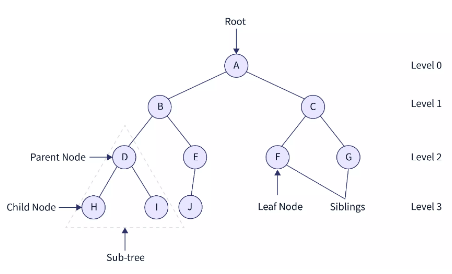

In [ ]:
# Define a basic binary tree node
class TreeNode:
    def __init__(self, value):
        self.value = value    # Node's value
        self.left = None      # Left child
        self.right = None     # Right child

# Construct a small binary tree:
#         10
#        /  \
#       5    15
#      / \
#     3   7

root = TreeNode(10)
root.left = TreeNode(5)
root.right = TreeNode(15)
root.left.left = TreeNode(3)
root.left.right = TreeNode(7)

# In-order traversal: Should print nodes in sorted order for a BST.
def in_order_traversal(node):
    if node:
        in_order_traversal(node.left)
        print(node.value, end=" ")
        in_order_traversal(node.right)

print("In-order traversal of the tree:")
in_order_traversal(root)  # Expected output: 3 5 7 10 15
print()  # Newline for clarity

In-order traversal of the tree:
3 5 7 10 15 


### Interview Question: Validate the Appointment Schedule BST
In a clinic's scheduling system, appointments are managed efficiently using a **Binary Search Tree (BST)**. Each node in the BST represents an appointment and contains essential information such as the appointment time, the patient's name, and the doctor's name. The BST structure ensures that the schedule is maintained in a sorted order by appointment time, enabling fast lookups, conflict checks, and efficient insertion or deletion of appointments.

A valid appointment schedule must have:
- Left Subtree: All appointments scheduled before the current node's appointment time.
- Right Subtree: All appointments scheduled after the current node's appointment time.

**How It Works**
1. Data Classes:
    - `Appointment` Class: Holds the details for an appointment.
    - `AppointmentNode` Class: Wraps an *Appointment* and contains pointers (`left` and `right`) to child nodes, forming the BST.

2. Validation Function:
    - Base Case: If the node is `None`, return `True` (an empty tree is valid).
    - Validation: Check if the node’s appointment time falls strictly between `min_time` and `max_time`.
    - Recursive Check:
        - Validate the left subtree, updating `max_time` to the current node's appointment time.
        - Validate the right subtree, updating `min_time` to the current node's appointment time.
        
This method runs in O(n) time, where n is the number of appointments.



In [ ]:
from datetime import datetime

class Appointment:
    def __init__(self, time, patient, doctor):
        """
        Represents an appointment.

        Args:
            time (datetime): The appointment time.
            patient (str): The patient's name.
            doctor (str): The doctor's name.
        """
        self.time = time
        self.patient = patient
        self.doctor = doctor

class AppointmentNode:
    def __init__(self, appointment):
        """
        Node for the appointment BST.

        Args:
            appointment (Appointment): The appointment data for this node.
        """
        self.appointment = appointment
        self.left = None
        self.right = None

def is_valid_appointment_schedule(node, min_time=datetime.min, max_time=datetime.max):
    """
    Validate that the appointment schedule, stored as a binary tree, is a valid BST.

    Each appointment must be scheduled such that:
    - All appointments in the left subtree are before the current appointment.
    - All appointments in the right subtree are after the current appointment.

    Args:
        node (AppointmentNode): The current node in the BST.
        min_time (datetime): The lower bound for valid appointment times.
            - For the first call, this is the beginning of datetime.min in Python,
              but with every recursive call it is replaced.
        max_time (datetime): The upper bound for valid appointment times.
            - Same as above, but for min_time, but for max_time.

    Returns:
        bool: True if the schedule is valid, False otherwise.
    """
    if node is None:
        return True  # An empty tree is valid
    if not (min_time < node.appointment.time < max_time):
        return False  # The BST property is violated
    # Recursively validate the left and right subtrees
    return (is_valid_appointment_schedule(node.left, min_time, node.appointment.time) and
            is_valid_appointment_schedule(node.right, node.appointment.time, max_time))

# Example usage:
# Create some appointment instances
appointment1 = Appointment(datetime(2025, 3, 10, 9, 0), "Alice", "Dr. Smith")
appointment2 = Appointment(datetime(2025, 3, 10, 10, 0), "Bob", "Dr. Jones")
appointment3 = Appointment(datetime(2025, 3, 10, 11, 0), "Charlie", "Dr. Lee")

# Build the BST (appointment schedule)
# The root is appointment2, with appointment1 scheduled before and appointment3 after.
root = AppointmentNode(appointment2)
root.left = AppointmentNode(appointment1)
root.right = AppointmentNode(appointment3)

# Validate the appointment schedule
print("Is the appointment schedule a valid BST?", is_valid_appointment_schedule(root))
# Expected output: True

Is the appointment schedule a valid BST? True


## Heaps in Python
- **Concept:** A heap is a specialized binary tree that maintains the heap property of sorted order. For a min-heap, the smallest element is at the root.
- **Real-World Example:** A task scheduler where each task has a numerical priority.
- **In Python:** We use the `heapq` module to create and manipulate heaps.
- **Performance:**
    - Converting a list to a heap is O(n).
    - Each pop operation is O(log n).
- **Interview Tip:**
    - Heapq is essential for implementing priority queues. Unlike FIFO (deque) or LIFO (stack),
      a heap always returns the highest priority (smallest value) first.
    - This is critical for dynamic scheduling and sorting problems.

### Interview Example: Simplified Heap Sort

Sort an array using a heap.

**Approach:**
1. Heapify the unsorted array.
2. Pop all elements from the heap one by one to build the sorted array.

Expected output for `[5, 3, 8, 1, 2, 9, 4]`:
`[1, 2, 3, 4, 5, 8, 9]`

In [ ]:
import heapq

# Given an unsorted list
unsorted_list = [5, 3, 8, 1, 2, 9, 4]

print("List before heapify:", unsorted_list)
# Convert the list into a heap (min-heap)
heapq.heapify(unsorted_list)
print("Heapified list (min-heap):", unsorted_list)

# Pop all elements from the heap to obtain a sorted list
sorted_list = [heapq.heappop(unsorted_list) for _ in range(len(unsorted_list))]
print("Sorted list using heap sort:", sorted_list)

List before heapify [5, 3, 8, 1, 2, 9, 4]
Heapified list (min-heap): [1, 2, 4, 3, 5, 9, 8]
Sorted list using heap sort: [1, 2, 3, 4, 5, 8, 9]


### Interview Example: Task Scheduler using Heapq

In this example, we have a list of tasks, each represented as a tuple:
- (priority, task_description)

A lower number for priority indicates a higher priority (i.e., 1 is the highest priority).

We use the `heapq` module to transform the list into a min-heap. In Python, when the heap contains tuples,
the heap functions compare the first element of each tuple by default. This means that the tuple with the smallest
priority value will always be at the root of the heap.

Approach:
1. Convert the list into a heap using `heapq.heapify()`.
2. Repeatedly use `heapq.heappop()` to remove and return the smallest element (i.e., the task with the highest priority).

In [ ]:
# List of tasks with priorities (lower number = higher priority)
tasks = [
    (3, "Process customer order"),
    (1, "Resolve critical bug"),
    (2, "Update website content"),
    (5, "Send email newsletter"),
    (4, "Backup database")
]

# Convert the list into a heap
heapq.heapify(tasks)
print("Task Heap:", tasks)

print("Processing tasks in order of priority:")

while tasks:
    priority, task = heapq.heappop(tasks)
    print(f"Priority {priority}: {task}")

Task Heap: [(1, 'Resolve critical bug'), (3, 'Process customer order'), (2, 'Update website content'), (5, 'Send email newsletter'), (4, 'Backup database')]
Processing tasks in order of priority:
Priority 1: Resolve critical bug
Priority 2: Update website content
Priority 3: Process customer order
Priority 4: Backup database
Priority 5: Send email newsletter
